# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.10000000149011612
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.09000000171363354
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.09000000171363354


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import gym
from gym import spaces

class TennismEnv(gym.Env):
    """Custom Tennis Environment that follows gym interface"""
    metadata = {'render.modes': ['human']}

    def __init__(self, env):
        super(TennismEnv, self).__init__()    # Define action and observation space
        self.tennis_env=env
        # They must be gym.spaces objects    # Example when using discrete actions:
        self.action_space = [spaces.Box(shape= [4], low=-1, high=1)]    # Example for using image as input:
#         self.observation_space = [spaces.Box(low=-15, high=15, shape=
#                         [24], dtype=np.float64), spaces.Box(low=-20, high=20, shape=
#                         [24], dtype=np.float64)]
        self.observation_space = [spaces.Box(low=-20, high=20, shape=
                        [48], dtype=np.float64)]

    def step(self, actions):
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = self.tennis_env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done 
#         print(next_states[0]+next_states[1])
        return list(np.array(next_states).flatten()), np.array(rewards).astype('float'), any(dones), None
    # Execute one time step within the environment
    def reset(self):
        env_info = self.tennis_env.reset(train_mode=True)[brain_name]     # reset the environment    
#         print(env_info.vector_observations)
        return env_info.vector_observations.flatten()

#     # Reset the state of the environment to an initial state
#     def render(self, mode='human', close=False):
#     # Render the environment to the screen
#     ...
len(TennismEnv(env).step(actions)[0])

48

In [8]:
## the following code cell was taken and customly adjusted to support MARL from ptan library source code. GitHub link: https://github.com/Shmuma/ptan.git 
import gym
import torch
import random
import collections
from torch.autograd import Variable

import numpy as np

from collections import namedtuple, deque

from ptan_util.agent import BaseAgent
from ptan_util.common import utils

# one single experience step
Experience = namedtuple('Experience', ['state', 'action', 'reward', 'done'])


class ExperienceSource:
    """
    Simple n-step experience source using single or multiple environments

    Every experience contains n list of Experience entries
    """
    def __init__(self, env, agent, steps_count=2, steps_delta=1, vectorized=False):
        """
        Create simple experience source
        :param env: environment or list of environments to be used
        :param agent: callable to convert batch of states into actions to take
        :param steps_count: count of steps to track for every experience chain
        :param steps_delta: how many steps to do between experience items
        :param vectorized: support of vectorized envs from OpenAI universe
        """
        assert isinstance(env, (gym.Env, list, tuple))
#         assert isinstance(agent, BaseAgent)
        assert isinstance(steps_count, int)
        assert steps_count >= 1
        assert isinstance(vectorized, bool)
        if isinstance(env, (list, tuple)):
            self.pool = env
        else:
            self.pool = [env]
        self.agent = agent
        self.steps_count = steps_count
        self.steps_delta = steps_delta
        self.total_rewards = []
        self.total_steps = []
        self.vectorized = vectorized

    def __iter__(self):
        states, agent_states, histories, cur_rewards, cur_steps = [], [], [], [], []
        env_lens = []
        for env in self.pool:
            obs = env.reset()
            # if the environment is vectorized, all it's output is lists of results.
            # Details are here: https://github.com/openai/universe/blob/master/doc/env_semantics.rst
            if self.vectorized:
                obs_len = len(obs)
                states.extend(obs)
            else:
                obs_len = 1
                states.append(obs)
            env_lens.append(obs_len)

            for _ in range(obs_len):
                histories.append(deque(maxlen=self.steps_count))
                cur_rewards.append(0.0)
                cur_steps.append(0)
                agent_states.append(self.agent.initial_state())

        iter_idx = 0
        while True:
            actions = [None] * len(states)
            states_input = []
            states_indices = []
            for idx, state in enumerate(states):
                if state is None:
                    actions[idx] = self.pool[0].action_space.sample()  # assume that all envs are from the same family
                else:
                    states_input.append(state)
                    states_indices.append(idx)
            if states_input:
                states_actions, new_agent_states = self.agent(states_input, agent_states)
                for idx, action in enumerate(states_actions):
                    g_idx = states_indices[idx]
                    actions[g_idx] = action
                    agent_states[g_idx] = new_agent_states[idx]
            grouped_actions = _group_list(actions, env_lens)

            global_ofs = 0
            for env_idx, (env, action_n) in enumerate(zip(self.pool, grouped_actions)):
                if self.vectorized:
                    next_state_n, r_n, is_done_n, _ = env.step(action_n)
                else:
                    next_state, r, is_done, _ = env.step(action_n[0])
                    next_state_n, r_n, is_done_n = [next_state], [r], [is_done]

                for ofs, (action, next_state, r, is_done) in enumerate(zip(action_n, next_state_n, r_n, is_done_n)):
                    idx = global_ofs + ofs
                    state = states[idx]
                    history = histories[idx]

                    cur_rewards[idx] += r
                    cur_steps[idx] += 1
                    if state is not None:
                        history.append(Experience(state=state, action=action, reward=r, done=is_done))
                    if len(history) == self.steps_count and iter_idx % self.steps_delta == 0:
                        yield tuple(history)
                    states[idx] = next_state
                    if is_done:
                        # in case of very short episode (shorter than our steps count), send gathered history
                        if 0 < len(history) < self.steps_count:
                            yield tuple(history)
                        # generate tail of history
                        while len(history) > 1:
                            history.popleft()
                            yield tuple(history)
                        self.total_rewards.append(cur_rewards[idx])
                        self.total_steps.append(cur_steps[idx])
                        cur_rewards[idx] = 0.0
                        cur_steps[idx] = 0
                        # vectorized envs are reset automatically
                        states[idx] = env.reset() if not self.vectorized else None
                        agent_states[idx] = self.agent.initial_state()
                        history.clear()
                global_ofs += len(action_n)
            iter_idx += 1

    def pop_total_rewards(self):
        r = self.total_rewards
        if r:
            self.total_rewards = []
            self.total_steps = []
        return r

    def pop_rewards_steps(self):
        res = list(zip(self.total_rewards, self.total_steps))
        if res:
            self.total_rewards, self.total_steps = [], []
        return res


def _group_list(items, lens):
    """
    Unflat the list of items by lens
    :param items: list of items
    :param lens: list of integers
    :return: list of list of items grouped by lengths
    """
    res = []
    cur_ofs = 0
    for g_len in lens:
        res.append(items[cur_ofs:cur_ofs+g_len])
        cur_ofs += g_len
    return res


# those entries are emitted from ExperienceSourceFirstLast. Reward is discounted over the trajectory piece
ExperienceFirstLast = collections.namedtuple('ExperienceFirstLast', ('state', 'action', 'reward', 'last_state'))


class ExperienceSourceFirstLast(ExperienceSource):
    """
    This is a wrapper around ExperienceSource to prevent storing full trajectory in replay buffer when we need
    only first and last states. For every trajectory piece it calculates discounted reward and emits only first
    and last states and action taken in the first state.

    If we have partial trajectory at the end of episode, last_state will be None
    """
    def __init__(self, env, agent, gamma, steps_count=1, steps_delta=1, vectorized=False):
        assert isinstance(gamma, float)
        super(ExperienceSourceFirstLast, self).__init__(env, agent, steps_count+1, steps_delta, vectorized=vectorized)
        self.gamma = gamma
        self.steps = steps_count

    def __iter__(self):
        for exp in super(ExperienceSourceFirstLast, self).__iter__():
            if exp[-1].done and len(exp) <= self.steps:
                last_state = None
                elems = exp
            else:
                last_state = exp[-1].state
                elems = exp[:-1]
            total_reward = 0.0
            for e in reversed(elems):
                total_reward *= self.gamma
                total_reward += e.reward
            yield ExperienceFirstLast(state=exp[0].state, action=exp[0].action,
                                      reward=total_reward, last_state=last_state)


def discount_with_dones(rewards, dones, gamma):
    discounted = []
    r = 0
    for reward, done in zip(rewards[::-1], dones[::-1]):
        r = reward + gamma*r*(1.-done)
        discounted.append(r)
    return discounted[::-1]


class ExperienceSourceRollouts:
    """
    N-step rollout experience source following A3C rollouts scheme. Have to be used with agent,
    keeping the value in its state (for example, agent.ActorCriticAgent).

    Yields batches of num_envs * n_steps samples with the following arrays:
    1. observations
    2. actions
    3. discounted rewards, with values approximation
    4. values
    """
    def __init__(self, env, agent, gamma, steps_count=5):
        """
        Constructs the rollout experience source
        :param env: environment or list of environments to be used
        :param agent: callable to convert batch of states into actions
        :param steps_count: how many steps to perform rollouts
        """
        assert isinstance(env, (gym.Env, list, tuple))
#         assert isinstance(agent, BaseAgent)
        assert isinstance(gamma, float)
        assert isinstance(steps_count, int)
        assert steps_count >= 1

        if isinstance(env, (list, tuple)):
            self.pool = env
        else:
            self.pool = [env]
        self.agent = agent
        self.gamma = gamma
        self.steps_count = steps_count
        self.total_rewards = []
        self.total_steps = []

    def __iter__(self):
        pool_size = len(self.pool)
        states = [np.array(e.reset()) for e in self.pool]
        mb_states = np.zeros((pool_size, self.steps_count) + states[0].shape, dtype=states[0].dtype)
        mb_rewards = np.zeros((pool_size, self.steps_count), dtype=np.float32)
        mb_values = np.zeros((pool_size, self.steps_count), dtype=np.float32)
        mb_actions = np.zeros((pool_size, self.steps_count), dtype=np.int64)
        mb_dones = np.zeros((pool_size, self.steps_count), dtype=np.bool)
        total_rewards = [0.0] * pool_size
        total_steps = [0] * pool_size
        agent_states = None
        step_idx = 0

        while True:
            actions, agent_states = self.agent(states, agent_states)
            rewards = []
            dones = []
            new_states = []
            for env_idx, (e, action) in enumerate(zip(self.pool, actions)):
                o, r, done, _ = e.step(action)
                total_rewards[env_idx] += r
                total_steps[env_idx] += 1
                if done:
                    o = e.reset()
                    self.total_rewards.append(total_rewards[env_idx])
                    self.total_steps.append(total_steps[env_idx])
                    total_rewards[env_idx] = 0.0
                    total_steps[env_idx] = 0
                new_states.append(np.array(o))
                dones.append(done)
                rewards.append(r)
            # we need an extra step to get values approximation for rollouts
            if step_idx == self.steps_count:
                # calculate rollout rewards
                for env_idx, (env_rewards, env_dones, last_value) in enumerate(zip(mb_rewards, mb_dones, agent_states)):
                    env_rewards = env_rewards.tolist()
                    env_dones = env_dones.tolist()
                    if not env_dones[-1]:
                        env_rewards = discount_with_dones(env_rewards + [last_value], env_dones + [False], self.gamma)[:-1]
                    else:
                        env_rewards = discount_with_dones(env_rewards, env_dones, self.gamma)
                    mb_rewards[env_idx] = env_rewards
                yield mb_states.reshape((-1,) + mb_states.shape[2:]), mb_rewards.flatten(), mb_actions.flatten(), mb_values.flatten()
                step_idx = 0
            mb_states[:, step_idx] = states
            mb_rewards[:, step_idx] = rewards
            mb_values[:, step_idx] = agent_states
            mb_actions[:, step_idx] = actions
            mb_dones[:, step_idx] = dones
            step_idx += 1
            states = new_states

    def pop_total_rewards(self):
        r = self.total_rewards
        if r:
            self.total_rewards = []
            self.total_steps = []
        return r

    def pop_rewards_steps(self):
        res = list(zip(self.total_rewards, self.total_steps))
        if res:
            self.total_rewards, self.total_steps = [], []
        return res


class ExperienceSourceBuffer:
    """
    The same as ExperienceSource, but takes episodes from the buffer
    """
    def __init__(self, buffer, steps_count=1):
        """
        Create buffered experience source
        :param buffer: list of episodes, each is a list of Experience object
        :param steps_count: count of steps in every entry
        """
        self.update_buffer(buffer)
        self.steps_count = steps_count

    def update_buffer(self, buffer):
        self.buffer = buffer
        self.lens = list(map(len, buffer))

    def __iter__(self):
        """
        Infinitely sample episode from the buffer and then sample item offset
        """
        while True:
            episode = random.randrange(len(self.buffer))
            ofs = random.randrange(self.lens[episode] - self.steps_count - 1)
            yield self.buffer[episode][ofs:ofs+self.steps_count]


class ExperienceReplayBuffer:
    def __init__(self, experience_source, buffer_size):
        assert isinstance(experience_source, (ExperienceSource, type(None)))
        assert isinstance(buffer_size, int)
        self.experience_source_iter = None if experience_source is None else iter(experience_source)
        self.buffer = []
        self.capacity = buffer_size
        self.pos = 0

    def __len__(self):
        return len(self.buffer)

    def __iter__(self):
        return iter(self.buffer)

    def sample(self, batch_size):
        """
        Get one random batch from experience replay
        TODO: implement sampling order policy
        :param batch_size:
        :return:
        """
        if len(self.buffer) <= batch_size:
            return self.buffer
        # Warning: replace=False makes random.choice O(n)
        keys = np.random.choice(len(self.buffer), batch_size, replace=True)
        return [self.buffer[key] for key in keys]

    def _add(self, sample):
        if len(self.buffer) < self.capacity:
            self.buffer.append(sample)
        else:
            self.buffer[self.pos] = sample
        self.pos = (self.pos + 1) % self.capacity

    def populate(self, samples):
        """
        Populates samples into the buffer
        :param samples: how many samples to populate
        """
        for _ in range(samples):
            entry = next(self.experience_source_iter)
            self._add(entry)

class PrioReplayBufferNaive:
    def __init__(self, exp_source, buf_size, prob_alpha=0.6):
        self.exp_source_iter = iter(exp_source)
        self.prob_alpha = prob_alpha
        self.capacity = buf_size
        self.pos = 0
        self.buffer = []
        self.priorities = np.zeros((buf_size, ), dtype=np.float32)

    def __len__(self):
        return len(self.buffer)

    def populate(self, count):
        max_prio = self.priorities.max() if self.buffer else 1.0
        for _ in range(count):
            sample = next(self.exp_source_iter)
            if len(self.buffer) < self.capacity:
                self.buffer.append(sample)
            else:
                self.buffer[self.pos] = sample
            self.priorities[self.pos] = max_prio
            self.pos = (self.pos + 1) % self.capacity

    def sample(self, batch_size, beta=0.4):
        if len(self.buffer) == self.capacity:
            prios = self.priorities
        else:
            prios = self.priorities[:self.pos]
        probs = np.array(prios, dtype=np.float32) ** self.prob_alpha

        probs /= probs.sum()
        indices = np.random.choice(len(self.buffer), batch_size, p=probs, replace=True)
        samples = [self.buffer[idx] for idx in indices]
        total = len(self.buffer)
        weights = (total * probs[indices]) ** (-beta)
        weights /= weights.max()
        return samples, indices, np.array(weights, dtype=np.float32)

    def update_priorities(self, batch_indices, batch_priorities):
        for idx, prio in zip(batch_indices, batch_priorities):
            self.priorities[idx] = prio


class PrioritizedReplayBuffer(ExperienceReplayBuffer):
    def __init__(self, experience_source, buffer_size, alpha):
        super(PrioritizedReplayBuffer, self).__init__(experience_source, buffer_size)
        assert alpha > 0
        self._alpha = alpha

        it_capacity = 1
        while it_capacity < buffer_size:
            it_capacity *= 2

        self._it_sum = utils.SumSegmentTree(it_capacity)
        self._it_min = utils.MinSegmentTree(it_capacity)
        self._max_priority = 1.0

    def _add(self, *args, **kwargs):
        idx = self.pos
        super()._add(*args, **kwargs)
        self._it_sum[idx] = self._max_priority ** self._alpha
        self._it_min[idx] = self._max_priority ** self._alpha

    def _sample_proportional(self, batch_size):
        res = []
        for _ in range(batch_size):
            mass = random.random() * self._it_sum.sum(0, len(self) - 1)
            idx = self._it_sum.find_prefixsum_idx(mass)
            res.append(idx)
        return res

    def sample(self, batch_size, beta):
        assert beta > 0

        idxes = self._sample_proportional(batch_size)

        weights = []
        p_min = self._it_min.min() / self._it_sum.sum()
        max_weight = (p_min * len(self)) ** (-beta)

        for idx in idxes:
            p_sample = self._it_sum[idx] / self._it_sum.sum()
            weight = (p_sample * len(self)) ** (-beta)
            weights.append(weight / max_weight)
        weights = np.array(weights, dtype=np.float32)
        samples = [self.buffer[idx] for idx in idxes]
        return samples, idxes, weights

    def update_priorities(self, idxes, priorities):
        assert len(idxes) == len(priorities)
        for idx, priority in zip(idxes, priorities):
            assert priority > 0
            assert 0 <= idx < len(self)
            self._it_sum[idx] = priority ** self._alpha
            self._it_min[idx] = priority ** self._alpha

            self._max_priority = max(self._max_priority, priority)


class BatchPreprocessor:
    """
    Abstract preprocessor class descendants to which converts experience
    batch to form suitable to learning.
    """
    def preprocess(self, batch):
        raise NotImplementedError


class QLearningPreprocessor(BatchPreprocessor):
    """
    Supports SimpleDQN, TargetDQN, DoubleDQN and can additionally feed TD-error back to
    experience replay buffer.

    To use different modes, use appropriate class method
    """
    def __init__(self, model, target_model, use_double_dqn=False, batch_td_error_hook=None, gamma=0.99, device="cpu"):
        self.model = model
        self.target_model = target_model
        self.use_double_dqn = use_double_dqn
        self.batch_dt_error_hook = batch_td_error_hook
        self.gamma = gamma
        self.device = device

    @staticmethod
    def simple_dqn(model, **kwargs):
        return QLearningPreprocessor(model=model, target_model=None, use_double_dqn=False, **kwargs)

    @staticmethod
    def target_dqn(model, target_model, **kwards):
        return QLearningPreprocessor(model, target_model, use_double_dqn=False, **kwards)

    @staticmethod
    def double_dqn(model, target_model, **kwargs):
        return QLearningPreprocessor(model, target_model, use_double_dqn=True, **kwargs)

    def _calc_Q(self, states_first, states_last):
        """
        Calculates apropriate q values for first and last states. Way of calculate depends on our settings.
        :param states_first: numpy array of first states
        :param states_last: numpy array of last states
        :return: tuple of numpy arrays of q values
        """
        # here we need both first and last values calculated using our main model, so we
        # combine both states into one batch for efficiency and separate results later
        if self.target_model is None or self.use_double_dqn:
            states_t = torch.tensor(np.concatenate((states_first, states_last), axis=0)).to(self.device)
            res_both = self.model(states_t).data.cpu().numpy()
            return res_both[:len(states_first)], res_both[len(states_first):]

        # in this case we have target_model set and use_double_dqn==False
        # so, we should calculate first_q and last_q using different models
        states_first_v = torch.tensor(states_first).to(self.device)
        states_last_v = torch.tensor(states_last).to(self.device)
        q_first = self.model(states_first_v).data
        q_last = self.target_model(states_last_v).data
        return q_first.cpu().numpy(), q_last.cpu().numpy()

    def _calc_target_rewards(self, states_last, q_last):
        """
        Calculate rewards from final states according to variants from our construction:
        1. simple DQN: max(Q(states, model))
        2. target DQN: max(Q(states, target_model))
        3. double DQN: Q(states, target_model)[argmax(Q(states, model)]
        :param states_last: numpy array of last states from the games
        :param q_last: numpy array of last q values
        :return: vector of target rewards
        """
        # in this case we handle both simple DQN and target DQN
        if self.target_model is None or not self.use_double_dqn:
            return q_last.max(axis=1)

        # here we have target_model set and use_double_dqn==True
        actions = q_last.argmax(axis=1)
        # calculate Q values using target net
        states_last_v = torch.tensor(states_last).to(self.device)
        q_last_target = self.target_model(states_last_v).data.cpu().numpy()
        return q_last_target[range(q_last_target.shape[0]), actions]

    def preprocess(self, batch):
        """
        Calculates data for Q learning from batch of observations
        :param batch: list of lists of Experience objects
        :return: tuple of numpy arrays:
            1. states -- observations
            2. target Q-values
            3. vector of td errors for every batch entry
        """
        # first and last states for every entry
        state_0 = np.array([exp[0].state for exp in batch], dtype=np.float32)
        state_L = np.array([exp[-1].state for exp in batch], dtype=np.float32)

        q0, qL = self._calc_Q(state_0, state_L)
        rewards = self._calc_target_rewards(state_L, qL)

        td = np.zeros(shape=(len(batch),))

        for idx, (total_reward, exps) in enumerate(zip(rewards, batch)):
            # game is done, no final reward
            if exps[-1].done:
                total_reward = 0.0
            for exp in reversed(exps[:-1]):
                total_reward *= self.gamma
                total_reward += exp.reward
            # update total reward and calculate td error
            act = exps[0].action
            td[idx] = q0[idx][act] - total_reward
            q0[idx][act] = total_reward

        return state_0, q0, td


In [9]:
## the following code cell was taken and customly adjusted to support MARL from ptan library source code. GitHub link: https://github.com/Shmuma/ptan.git 
import sys
import time
import operator
from datetime import timedelta
import numpy as np
import collections

import torch
import torch.nn as nn

class RewardTracker:
    def __init__(self, writer, min_ts_diff=1.0):
        """
        Constructs RewardTracker
        :param writer: writer to use for writing stats
        :param min_ts_diff: minimal time difference to track speed
        """
        self.writer = writer
        self.min_ts_diff = min_ts_diff

    def __enter__(self):
        self.ts = time.time()
        self.ts_frame = 0
        self.total_rewards = []
        return self

    def __exit__(self, *args):
        self.writer.close()

    def reward(self, reward, frame, epsilon=None):
        self.total_rewards.append(reward)
        mean_reward = np.mean(self.total_rewards[-100:])
        ts_diff = time.time() - self.ts
        if ts_diff > self.min_ts_diff:
            speed = (frame - self.ts_frame) / ts_diff
            self.ts_frame = frame
            self.ts = time.time()
            epsilon_str = "" if epsilon is None else ", eps %.2f" % epsilon
            print("%d: done %d episodes, mean reward %.3f, speed %.2f f/s%s" % (
                frame, len(self.total_rewards), mean_reward, speed, epsilon_str
            ))
            sys.stdout.flush()
            self.writer.add_scalar("speed", speed, frame)
        if epsilon is not None:
            self.writer.add_scalar("epsilon", epsilon, frame)
        self.writer.add_scalar("reward_100", mean_reward, frame)
        self.writer.add_scalars("reward", {'agent1': reward[0], 'agent2': reward[1]}, frame)
        return mean_reward if len(self.total_rewards) > 30 else None


class TBMeanTracker:
    """
    TensorBoard value tracker: allows to batch fixed amount of historical values and write their mean into TB

    Designed and tested with pytorch-tensorboard in mind
    """
    def __init__(self, writer, batch_size):
        """
        :param writer: writer with close() and add_scalar() methods
        :param batch_size: integer size of batch to track
        """
        assert isinstance(batch_size, int)
        assert writer is not None
        self.writer = writer
        self.batch_size = batch_size

    def __enter__(self):
        self._batches = collections.defaultdict(list)
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.writer.close()

    @staticmethod
    def _as_float(value):
        assert isinstance(value, (float, int, np.ndarray, np.generic, torch.autograd.Variable)) or torch.is_tensor(value)
        tensor_val = None
        if isinstance(value, torch.autograd.Variable):
            tensor_val = value.data
        elif torch.is_tensor(value):
            tensor_val = value

        if tensor_val is not None:
            return tensor_val.float().mean().item()
        elif isinstance(value, np.ndarray):
            return float(np.mean(value))
        else:
            return float(value)

    def track(self, param_name, value, iter_index):
        assert isinstance(param_name, str)
        assert isinstance(iter_index, int)

        data = self._batches[param_name]
        data.append(self._as_float(value))

        if len(data) >= self.batch_size:
            self.writer.add_scalar(param_name, np.mean(data), iter_index)
            data.clear()

In [11]:
## the following code cell implimentation of SAC algorithm was taken and customly adjusted from one of my favorite books in Deep Reinforcement Learning by Maxim Lapan Chapter 19(i own a copy) GitHub link: https://github.com/PacktPublishing/Deep-Reinforcement-Learning-Hands-On-Second-Edition.git
import os
import ptan
import gym
import math
import time
import pybullet_envs
import argparse
from tensorboardX import SummaryWriter
import numpy as np

from lib import model, common, test_net

import torch
import torch.optim as optim
import torch.distributions as distrib
import torch.nn.functional as F


GAMMA = 0.99
BATCH_SIZE = 64
LR_ACTS = 1e-4
LR_VALS = 1e-4
REPLAY_SIZE = 100000
REPLAY_INITIAL = 10000
SAC_ENTROPY_ALPHA = 0.1

TEST_ITERS = 10000

# parser = argparse.ArgumentParser()
# parser.add_argument("--cuda", default=True, action='store_true', help='Enable CUDA')
#     parser.add_argument("-n", "--name", default='A', help="Name of the run")
#     parser.add_argument("-e", "--env", default=ENV_ID, help="Environment id, default=" + ENV_ID)
# args = parser.parse_args()
device = torch.device("cuda" if True else "cpu")

save_path = os.path.join("saves", "sac-" + 'tennis')
os.makedirs(save_path, exist_ok=True)

tennis_env = TennismEnv(env)
test_env = TennismEnv(env)

act_net = model.ModelActor(
    state_size*2,
    action_size*2).to(device)
crt_net = model.ModelCritic(
    state_size*2
).to(device)
twinq_net = model.ModelSACTwinQ(
    state_size*2,
    action_size*2).to(device)
print(act_net)
print(crt_net)
print(twinq_net)

tgt_crt_net = ptan.agent.TargetNet(crt_net)

writer = SummaryWriter(comment="-sac_" + 'tennis')
agent = model.AgentDDPG(act_net, device=device)
exp_source = ExperienceSourceFirstLast(
    tennis_env, agent, gamma=GAMMA, steps_count=1)
buffer = ExperienceReplayBuffer(
    exp_source, buffer_size=REPLAY_SIZE)
act_opt = optim.Adam(act_net.parameters(), lr=LR_ACTS)
crt_opt = optim.Adam(crt_net.parameters(), lr=LR_VALS)
twinq_opt = optim.Adam(twinq_net.parameters(), lr=LR_VALS)

frame_idx = 0
best_reward = None
with RewardTracker(writer) as tracker:
    with TBMeanTracker(
            writer, batch_size=10) as tb_tracker:
        while True:
            frame_idx += 1
            buffer.populate(1)
            rewards_steps = exp_source.pop_rewards_steps()
            if rewards_steps:
                rewards, steps = zip(*rewards_steps)
                tb_tracker.track("episode_steps", steps[0], frame_idx)
                tracker.reward(rewards[0], frame_idx)

            if len(buffer) < REPLAY_INITIAL:
                continue

            batch = buffer.sample(BATCH_SIZE)
            states_v, actions_v, ref_vals_v, ref_q_v = \
                common.unpack_batch_sac(
                    batch, tgt_crt_net.target_model,
                    twinq_net, act_net, GAMMA,
                    SAC_ENTROPY_ALPHA, device)

            tb_tracker.track("ref_v", ref_vals_v.mean(), frame_idx)
            tb_tracker.track("ref_q", ref_q_v.mean(), frame_idx)

            # train TwinQ
            twinq_opt.zero_grad()
            q1_v, q2_v = twinq_net(states_v, actions_v)
#             print(q1_v.shape, ref_q_v.shape)
            q1_loss_v = F.mse_loss(q1_v.repeat(1,2),
                                   ref_q_v.detach())
            q2_loss_v = F.mse_loss(q2_v.repeat(1,2),
                                   ref_q_v.detach())
            q_loss_v = q1_loss_v + q2_loss_v
            q_loss_v.backward()
            twinq_opt.step()
            tb_tracker.track("loss_q1", q1_loss_v, frame_idx)
            tb_tracker.track("loss_q2", q2_loss_v, frame_idx)

            # Critic
            crt_opt.zero_grad()
            val_v = crt_net(states_v)
            v_loss_v = F.mse_loss(val_v.squeeze(),
                                  ref_vals_v.detach())
            v_loss_v.backward()
            crt_opt.step()
            tb_tracker.track("loss_v", v_loss_v, frame_idx)

            # Actor
            act_opt.zero_grad()
            acts_v = act_net(states_v)
            q_out_v, _ = twinq_net(states_v, acts_v)
            act_loss = -q_out_v.mean()
            act_loss.backward()
            act_opt.step()
            tb_tracker.track("loss_act", act_loss, frame_idx)

            tgt_crt_net.alpha_sync(alpha=1 - 1e-3)

            if frame_idx % TEST_ITERS == 0:
                ts = time.time()
                rewards, steps = [], []
                for test_i in range(4):
                    reward, step = test_net(act_net, test_env, device=device)
                    rewards.append(float(np.mean(reward)))
                    steps.append(step)
                rewards = float(np.mean(rewards))
                steps = int(np.mean(steps))
                print("Test done in %.2f sec, reward %.3f, steps %d" % (
                    time.time() - ts, rewards, steps))
                writer.add_scalar("test_reward", rewards, frame_idx)
                writer.add_scalar("test_steps", steps, frame_idx)
                if best_reward is None or best_reward < rewards:
                    if best_reward is not None:
                        print("Best reward updated: %.3f -> %.3f" % (best_reward, rewards))
                        name = "best_%+.3f_%d.dat" % (rewards, frame_idx)
                        fname = os.path.join(save_path, name)
                        torch.save(act_net.state_dict(), fname)
                    best_reward = rewards

ModelActor(
  (mu1): Sequential(
    (0): Linear(in_features=48, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=2, bias=True)
    (5): Tanh()
  )
  (mu2): Sequential(
    (0): Linear(in_features=48, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=2, bias=True)
    (5): Tanh()
  )
)
ModelCritic(
  (value): Sequential(
    (0): Linear(in_features=48, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
)
ModelSACTwinQ(
  (q1): Sequential(
    (0): Linear(in_features=52, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_featur

16510: done 1105 episodes, mean reward -0.004, speed 66.48 f/s
16596: done 1111 episodes, mean reward -0.004, speed 72.18 f/s
16667: done 1116 episodes, mean reward -0.004, speed 66.58 f/s
16752: done 1122 episodes, mean reward -0.004, speed 72.96 f/s
16823: done 1127 episodes, mean reward -0.004, speed 68.16 f/s
16894: done 1132 episodes, mean reward -0.004, speed 66.12 f/s
16965: done 1137 episodes, mean reward -0.004, speed 69.66 f/s
17036: done 1142 episodes, mean reward -0.004, speed 69.90 f/s
17107: done 1147 episodes, mean reward -0.004, speed 70.65 f/s
17192: done 1153 episodes, mean reward -0.005, speed 70.58 f/s
17277: done 1159 episodes, mean reward -0.005, speed 72.05 f/s
17348: done 1164 episodes, mean reward -0.005, speed 68.51 f/s
17419: done 1169 episodes, mean reward -0.005, speed 68.85 f/s
17490: done 1174 episodes, mean reward -0.005, speed 67.51 f/s
17561: done 1179 episodes, mean reward -0.005, speed 70.13 f/s
17632: done 1184 episodes, mean reward -0.005, speed 70

26201: done 1745 episodes, mean reward 0.004, speed 69.45 f/s
26272: done 1750 episodes, mean reward 0.003, speed 69.34 f/s
26357: done 1756 episodes, mean reward 0.003, speed 70.96 f/s
26428: done 1761 episodes, mean reward 0.003, speed 66.73 f/s
26499: done 1766 episodes, mean reward 0.003, speed 66.52 f/s
26570: done 1771 episodes, mean reward 0.002, speed 66.18 f/s
26641: done 1776 episodes, mean reward 0.001, speed 65.87 f/s
26712: done 1781 episodes, mean reward 0.001, speed 67.94 f/s
26783: done 1786 episodes, mean reward -0.001, speed 69.62 f/s
26854: done 1791 episodes, mean reward -0.002, speed 69.32 f/s
26925: done 1796 episodes, mean reward -0.003, speed 67.00 f/s
26996: done 1801 episodes, mean reward -0.003, speed 70.80 f/s
27081: done 1807 episodes, mean reward -0.004, speed 71.72 f/s
27152: done 1812 episodes, mean reward -0.004, speed 69.72 f/s
27223: done 1817 episodes, mean reward -0.005, speed 69.76 f/s
27309: done 1823 episodes, mean reward -0.005, speed 72.46 f/s


35667: done 2366 episodes, mean reward 0.007, speed 63.21 f/s
35739: done 2370 episodes, mean reward 0.007, speed 60.56 f/s
35814: done 2374 episodes, mean reward 0.008, speed 60.15 f/s
35876: done 2377 episodes, mean reward 0.008, speed 60.71 f/s
35951: done 2381 episodes, mean reward 0.008, speed 63.24 f/s
36045: done 2385 episodes, mean reward 0.009, speed 62.34 f/s
36110: done 2387 episodes, mean reward 0.010, speed 60.17 f/s
36186: done 2391 episodes, mean reward 0.010, speed 63.13 f/s
36263: done 2395 episodes, mean reward 0.010, speed 59.64 f/s
36334: done 2400 episodes, mean reward 0.009, speed 63.93 f/s
36413: done 2403 episodes, mean reward 0.010, speed 62.86 f/s
36492: done 2407 episodes, mean reward 0.009, speed 60.29 f/s
36562: done 2412 episodes, mean reward 0.009, speed 61.90 f/s
36672: done 2417 episodes, mean reward 0.009, speed 64.56 f/s
36739: done 2420 episodes, mean reward 0.010, speed 62.89 f/s
36810: done 2421 episodes, mean reward 0.011, speed 65.72 f/s
36885: d

45608: done 2904 episodes, mean reward 0.006, speed 69.68 f/s
45681: done 2908 episodes, mean reward 0.007, speed 69.43 f/s
45756: done 2911 episodes, mean reward 0.007, speed 68.98 f/s
45831: done 2914 episodes, mean reward 0.007, speed 71.43 f/s
45902: done 2919 episodes, mean reward 0.006, speed 67.91 f/s
45991: done 2924 episodes, mean reward 0.006, speed 69.34 f/s
46066: done 2927 episodes, mean reward 0.006, speed 66.86 f/s
46152: done 2933 episodes, mean reward 0.004, speed 72.75 f/s
46231: done 2937 episodes, mean reward 0.005, speed 67.72 f/s
46304: done 2941 episodes, mean reward 0.004, speed 70.66 f/s
46387: done 2943 episodes, mean reward 0.005, speed 68.73 f/s
46460: done 2946 episodes, mean reward 0.006, speed 64.35 f/s
46536: done 2950 episodes, mean reward 0.006, speed 71.95 f/s
46608: done 2954 episodes, mean reward 0.007, speed 69.56 f/s
46689: done 2959 episodes, mean reward 0.007, speed 68.56 f/s
46763: done 2962 episodes, mean reward 0.007, speed 68.57 f/s
46837: d

56024: done 3413 episodes, mean reward 0.017, speed 69.87 f/s
56105: done 3416 episodes, mean reward 0.017, speed 71.94 f/s
56222: done 3419 episodes, mean reward 0.019, speed 69.05 f/s
56312: done 3420 episodes, mean reward 0.020, speed 66.70 f/s
56383: done 3423 episodes, mean reward 0.020, speed 68.28 f/s
56459: done 3426 episodes, mean reward 0.021, speed 65.31 f/s
56535: done 3430 episodes, mean reward 0.021, speed 67.26 f/s
56626: done 3434 episodes, mean reward 0.021, speed 68.58 f/s
56708: done 3436 episodes, mean reward 0.022, speed 67.82 f/s
56799: done 3440 episodes, mean reward 0.022, speed 70.78 f/s
56875: done 3442 episodes, mean reward 0.022, speed 65.33 f/s
56953: done 3445 episodes, mean reward 0.023, speed 70.22 f/s
57025: done 3449 episodes, mean reward 0.022, speed 71.43 f/s
57113: done 3454 episodes, mean reward 0.022, speed 69.40 f/s
57187: done 3458 episodes, mean reward 0.022, speed 72.70 f/s
57270: done 3460 episodes, mean reward 0.023, speed 69.47 f/s
57361: d

66964: done 3860 episodes, mean reward 0.017, speed 68.77 f/s
67040: done 3863 episodes, mean reward 0.018, speed 67.73 f/s
67129: done 3867 episodes, mean reward 0.018, speed 71.11 f/s
67205: done 3871 episodes, mean reward 0.017, speed 68.78 f/s
67275: done 3876 episodes, mean reward 0.014, speed 68.85 f/s
67367: done 3879 episodes, mean reward 0.015, speed 73.32 f/s
67457: done 3883 episodes, mean reward 0.016, speed 66.83 f/s
67532: done 3887 episodes, mean reward 0.014, speed 70.20 f/s
67605: done 3891 episodes, mean reward 0.014, speed 67.86 f/s
67687: done 3893 episodes, mean reward 0.015, speed 70.77 f/s
67775: done 3896 episodes, mean reward 0.015, speed 67.98 f/s
67845: done 3900 episodes, mean reward 0.015, speed 65.43 f/s
67917: done 3905 episodes, mean reward 0.013, speed 69.52 f/s
68008: done 3908 episodes, mean reward 0.014, speed 66.02 f/s
68081: done 3911 episodes, mean reward 0.015, speed 69.52 f/s
68154: done 3915 episodes, mean reward 0.015, speed 66.39 f/s
68230: d

77972: done 4307 episodes, mean reward 0.028, speed 68.34 f/s
78046: done 4310 episodes, mean reward 0.027, speed 66.45 f/s
78160: done 4315 episodes, mean reward 0.027, speed 70.03 f/s
78250: done 4319 episodes, mean reward 0.026, speed 71.42 f/s
78324: done 4323 episodes, mean reward 0.025, speed 68.69 f/s
78400: done 4326 episodes, mean reward 0.025, speed 70.67 f/s
78467: done 4328 episodes, mean reward 0.026, speed 63.14 f/s
78555: done 4332 episodes, mean reward 0.025, speed 68.86 f/s
78631: done 4334 episodes, mean reward 0.025, speed 70.36 f/s
78723: done 4338 episodes, mean reward 0.026, speed 70.13 f/s
78798: done 4341 episodes, mean reward 0.027, speed 71.92 f/s
78892: done 4345 episodes, mean reward 0.025, speed 68.41 f/s
78984: done 4347 episodes, mean reward 0.026, speed 69.70 f/s
79168: done 4351 episodes, mean reward 0.027, speed 67.84 f/s
79257: done 4355 episodes, mean reward 0.026, speed 70.48 f/s
79346: done 4359 episodes, mean reward 0.026, speed 68.12 f/s
79416: d

89857: done 4714 episodes, mean reward 0.053, speed 70.17 f/s
89960: done 4717 episodes, mean reward 0.052, speed 68.79 f/s
Test done in 3.46 sec, reward 0.084, steps 47
Best reward updated: 0.032 -> 0.084
90017: done 4718 episodes, mean reward 0.052, speed 13.16 f/s
90109: done 4721 episodes, mean reward 0.053, speed 70.82 f/s
90232: done 4723 episodes, mean reward 0.055, speed 69.77 f/s
90307: done 4727 episodes, mean reward 0.051, speed 67.31 f/s
90387: done 4730 episodes, mean reward 0.051, speed 68.58 f/s
90468: done 4732 episodes, mean reward 0.052, speed 65.18 f/s
90544: done 4735 episodes, mean reward 0.050, speed 70.60 f/s
90644: done 4737 episodes, mean reward 0.051, speed 71.85 f/s
90794: done 4740 episodes, mean reward 0.054, speed 69.36 f/s
90869: done 4744 episodes, mean reward 0.053, speed 67.35 f/s
91042: done 4747 episodes, mean reward 0.055, speed 69.74 f/s
91145: done 4749 episodes, mean reward 0.057, speed 71.78 f/s
91296: done 4752 episodes, mean reward 0.059, spee

102637: done 5023 episodes, mean reward 0.077, speed 69.98 f/s
102725: done 5028 episodes, mean reward 0.073, speed 69.44 f/s
102859: done 5031 episodes, mean reward 0.072, speed 68.82 f/s
102942: done 5033 episodes, mean reward 0.071, speed 68.73 f/s
103041: done 5035 episodes, mean reward 0.071, speed 73.07 f/s
103131: done 5036 episodes, mean reward 0.073, speed 68.27 f/s
103204: done 5038 episodes, mean reward 0.073, speed 69.18 f/s
103300: done 5041 episodes, mean reward 0.072, speed 68.12 f/s
103376: done 5044 episodes, mean reward 0.071, speed 67.47 f/s
103506: done 5047 episodes, mean reward 0.072, speed 70.51 f/s
103624: done 5050 episodes, mean reward 0.072, speed 68.79 f/s
103714: done 5054 episodes, mean reward 0.070, speed 68.39 f/s
103796: done 5056 episodes, mean reward 0.070, speed 70.21 f/s
103955: done 5059 episodes, mean reward 0.070, speed 70.04 f/s
104139: done 5060 episodes, mean reward 0.072, speed 69.83 f/s
104407: done 5063 episodes, mean reward 0.075, speed 69

117947: done 5298 episodes, mean reward 0.124, speed 67.25 f/s
118023: done 5301 episodes, mean reward 0.123, speed 63.69 f/s
118207: done 5302 episodes, mean reward 0.127, speed 68.39 f/s
118310: done 5304 episodes, mean reward 0.123, speed 69.97 f/s
118442: done 5307 episodes, mean reward 0.121, speed 70.19 f/s
118598: done 5308 episodes, mean reward 0.124, speed 69.40 f/s
118687: done 5310 episodes, mean reward 0.124, speed 68.91 f/s
118769: done 5312 episodes, mean reward 0.121, speed 69.99 f/s
118991: done 5313 episodes, mean reward 0.124, speed 67.72 f/s
119074: done 5315 episodes, mean reward 0.125, speed 69.87 f/s
119184: done 5318 episodes, mean reward 0.125, speed 71.59 f/s
119344: done 5320 episodes, mean reward 0.127, speed 70.33 f/s
119471: done 5321 episodes, mean reward 0.130, speed 68.12 f/s
119637: done 5322 episodes, mean reward 0.134, speed 71.15 f/s
119910: done 5324 episodes, mean reward 0.137, speed 68.24 f/s
Test done in 7.63 sec, reward 0.233, steps 102
Best rew

135257: done 5531 episodes, mean reward 0.143, speed 69.64 f/s
135359: done 5533 episodes, mean reward 0.144, speed 67.27 f/s
135573: done 5535 episodes, mean reward 0.147, speed 70.01 f/s
135645: done 5536 episodes, mean reward 0.148, speed 67.21 f/s
135747: done 5538 episodes, mean reward 0.149, speed 68.19 f/s
135854: done 5539 episodes, mean reward 0.151, speed 69.25 f/s
135938: done 5541 episodes, mean reward 0.147, speed 69.95 f/s
136156: done 5543 episodes, mean reward 0.150, speed 67.44 f/s
136316: done 5545 episodes, mean reward 0.153, speed 68.63 f/s
136505: done 5548 episodes, mean reward 0.151, speed 68.81 f/s
136625: done 5549 episodes, mean reward 0.150, speed 69.13 f/s
136751: done 5551 episodes, mean reward 0.149, speed 66.99 f/s
136855: done 5553 episodes, mean reward 0.149, speed 68.11 f/s
136961: done 5554 episodes, mean reward 0.151, speed 70.74 f/s
137062: done 5556 episodes, mean reward 0.151, speed 69.55 f/s
137148: done 5557 episodes, mean reward 0.152, speed 67

153651: done 5750 episodes, mean reward 0.194, speed 71.79 f/s
153740: done 5751 episodes, mean reward 0.195, speed 73.32 f/s
153853: done 5754 episodes, mean reward 0.178, speed 71.37 f/s
153963: done 5755 episodes, mean reward 0.180, speed 73.12 f/s
154056: done 5758 episodes, mean reward 0.178, speed 75.09 f/s
154160: done 5759 episodes, mean reward 0.173, speed 72.65 f/s
154359: done 5761 episodes, mean reward 0.176, speed 72.30 f/s
154513: done 5762 episodes, mean reward 0.178, speed 71.51 f/s
154649: done 5765 episodes, mean reward 0.173, speed 71.55 f/s
154728: done 5767 episodes, mean reward 0.173, speed 72.83 f/s
154963: done 5768 episodes, mean reward 0.177, speed 71.21 f/s
155052: done 5769 episodes, mean reward 0.178, speed 74.09 f/s
155302: done 5771 episodes, mean reward 0.183, speed 70.83 f/s
155519: done 5773 episodes, mean reward 0.184, speed 72.16 f/s
155625: done 5774 episodes, mean reward 0.181, speed 74.57 f/s
155724: done 5776 episodes, mean reward 0.182, speed 73

177211: done 5942 episodes, mean reward 0.330, speed 71.58 f/s
177472: done 5943 episodes, mean reward 0.336, speed 69.79 f/s
177624: done 5944 episodes, mean reward 0.337, speed 72.86 f/s
177790: done 5945 episodes, mean reward 0.339, speed 72.58 f/s
177918: done 5946 episodes, mean reward 0.340, speed 75.61 f/s
178136: done 5948 episodes, mean reward 0.339, speed 71.37 f/s
178288: done 5950 episodes, mean reward 0.337, speed 73.93 f/s
178411: done 5952 episodes, mean reward 0.337, speed 73.67 f/s
178517: done 5953 episodes, mean reward 0.337, speed 71.91 f/s
178607: done 5954 episodes, mean reward 0.338, speed 71.05 f/s
178752: done 5955 episodes, mean reward 0.338, speed 73.30 f/s
178855: done 5957 episodes, mean reward 0.329, speed 74.52 f/s
178961: done 5958 episodes, mean reward 0.330, speed 71.08 f/s
179063: done 5960 episodes, mean reward 0.327, speed 75.22 f/s
179178: done 5962 episodes, mean reward 0.328, speed 72.73 f/s
179324: done 5963 episodes, mean reward 0.326, speed 71

201478: done 6125 episodes, mean reward 0.352, speed 72.31 f/s
201892: done 6126 episodes, mean reward 0.360, speed 72.70 f/s
201981: done 6127 episodes, mean reward 0.358, speed 72.44 f/s
202869: done 6128 episodes, mean reward 0.379, speed 72.31 f/s
203073: done 6129 episodes, mean reward 0.382, speed 74.35 f/s
203272: done 6131 episodes, mean reward 0.382, speed 73.21 f/s
203529: done 6133 episodes, mean reward 0.384, speed 72.49 f/s
203658: done 6134 episodes, mean reward 0.386, speed 72.17 f/s
203896: done 6135 episodes, mean reward 0.391, speed 72.17 f/s
204156: done 6136 episodes, mean reward 0.387, speed 72.03 f/s
204412: done 6137 episodes, mean reward 0.392, speed 71.55 f/s
204506: done 6138 episodes, mean reward 0.393, speed 74.17 f/s
204608: done 6139 episodes, mean reward 0.388, speed 74.05 f/s
204806: done 6140 episodes, mean reward 0.390, speed 73.38 f/s
205067: done 6141 episodes, mean reward 0.390, speed 73.05 f/s
205621: done 6142 episodes, mean reward 0.401, speed 72

232489: done 6292 episodes, mean reward 0.437, speed 70.25 f/s
233375: done 6293 episodes, mean reward 0.459, speed 70.83 f/s
233458: done 6294 episodes, mean reward 0.457, speed 72.62 f/s
233681: done 6295 episodes, mean reward 0.459, speed 69.72 f/s
234107: done 6297 episodes, mean reward 0.458, speed 69.42 f/s
234292: done 6298 episodes, mean reward 0.460, speed 71.72 f/s
234944: done 6299 episodes, mean reward 0.475, speed 70.01 f/s
235289: done 6300 episodes, mean reward 0.483, speed 71.00 f/s
235462: done 6302 episodes, mean reward 0.482, speed 72.11 f/s
235801: done 6303 episodes, mean reward 0.488, speed 69.64 f/s
235949: done 6304 episodes, mean reward 0.487, speed 70.62 f/s
236038: done 6305 episodes, mean reward 0.486, speed 71.83 f/s
236172: done 6307 episodes, mean reward 0.486, speed 69.94 f/s
236315: done 6308 episodes, mean reward 0.489, speed 72.15 f/s
236782: done 6309 episodes, mean reward 0.497, speed 70.11 f/s
237047: done 6311 episodes, mean reward 0.497, speed 69

267475: done 6452 episodes, mean reward 0.590, speed 72.59 f/s
267596: done 6454 episodes, mean reward 0.592, speed 73.39 f/s
267687: done 6455 episodes, mean reward 0.589, speed 68.97 f/s
268117: done 6456 episodes, mean reward 0.596, speed 72.12 f/s
268278: done 6458 episodes, mean reward 0.600, speed 73.72 f/s
268782: done 6459 episodes, mean reward 0.609, speed 73.17 f/s
269025: done 6460 episodes, mean reward 0.612, speed 71.39 f/s
269204: done 6461 episodes, mean reward 0.616, speed 75.13 f/s
269408: done 6462 episodes, mean reward 0.605, speed 73.09 f/s
269495: done 6463 episodes, mean reward 0.593, speed 70.64 f/s
269797: done 6464 episodes, mean reward 0.594, speed 72.30 f/s
269906: done 6465 episodes, mean reward 0.594, speed 70.14 f/s
Test done in 48.73 sec, reward 1.848, steps 715
270155: done 6466 episodes, mean reward 0.588, speed 4.76 f/s
270562: done 6468 episodes, mean reward 0.592, speed 72.84 f/s
270666: done 6470 episodes, mean reward 0.586, speed 69.64 f/s
270756: 

299012: done 6619 episodes, mean reward 0.442, speed 71.44 f/s
299114: done 6620 episodes, mean reward 0.441, speed 71.83 f/s
299232: done 6622 episodes, mean reward 0.433, speed 73.09 f/s
299601: done 6623 episodes, mean reward 0.440, speed 69.39 f/s
299852: done 6624 episodes, mean reward 0.432, speed 69.73 f/s
Test done in 24.53 sec, reward 0.907, steps 357
300056: done 6625 episodes, mean reward 0.428, speed 7.44 f/s
300314: done 6626 episodes, mean reward 0.430, speed 71.67 f/s
300490: done 6627 episodes, mean reward 0.433, speed 72.49 f/s
300689: done 6628 episodes, mean reward 0.438, speed 70.40 f/s
301446: done 6630 episodes, mean reward 0.450, speed 70.57 f/s
301561: done 6631 episodes, mean reward 0.445, speed 72.61 f/s
301643: done 6632 episodes, mean reward 0.445, speed 69.73 f/s
301715: done 6633 episodes, mean reward 0.445, speed 71.26 f/s
301957: done 6634 episodes, mean reward 0.443, speed 71.85 f/s
302175: done 6635 episodes, mean reward 0.448, speed 72.01 f/s
302410: 

331696: done 6783 episodes, mean reward 0.501, speed 66.94 f/s
332094: done 6785 episodes, mean reward 0.503, speed 66.52 f/s
332483: done 6788 episodes, mean reward 0.489, speed 66.81 f/s
333303: done 6789 episodes, mean reward 0.509, speed 67.80 f/s
333619: done 6790 episodes, mean reward 0.517, speed 67.81 f/s
334009: done 6791 episodes, mean reward 0.526, speed 69.74 f/s
334308: done 6792 episodes, mean reward 0.531, speed 69.33 f/s
334486: done 6794 episodes, mean reward 0.525, speed 70.37 f/s
334552: done 6796 episodes, mean reward 0.498, speed 65.78 f/s
335026: done 6798 episodes, mean reward 0.498, speed 67.29 f/s
335672: done 6799 episodes, mean reward 0.514, speed 68.58 f/s
336066: done 6800 episodes, mean reward 0.505, speed 67.82 f/s
336298: done 6802 episodes, mean reward 0.509, speed 70.21 f/s
337018: done 6803 episodes, mean reward 0.527, speed 69.36 f/s
337591: done 6804 episodes, mean reward 0.540, speed 69.56 f/s
337850: done 6805 episodes, mean reward 0.545, speed 70

373955: done 6950 episodes, mean reward 0.633, speed 68.02 f/s
374121: done 6951 episodes, mean reward 0.633, speed 70.43 f/s
374456: done 6952 episodes, mean reward 0.638, speed 70.15 f/s
374557: done 6954 episodes, mean reward 0.622, speed 67.17 f/s
374801: done 6956 episodes, mean reward 0.605, speed 68.62 f/s
375460: done 6957 episodes, mean reward 0.618, speed 68.39 f/s
375561: done 6958 episodes, mean reward 0.619, speed 70.69 f/s
376562: done 6959 episodes, mean reward 0.644, speed 68.64 f/s
377018: done 6960 episodes, mean reward 0.653, speed 68.72 f/s
377314: done 6961 episodes, mean reward 0.657, speed 69.21 f/s
377474: done 6962 episodes, mean reward 0.661, speed 68.47 f/s
378180: done 6964 episodes, mean reward 0.661, speed 69.19 f/s
378620: done 6965 episodes, mean reward 0.668, speed 68.54 f/s
378834: done 6966 episodes, mean reward 0.668, speed 71.36 f/s
379563: done 6968 episodes, mean reward 0.684, speed 69.42 f/s
379704: done 6969 episodes, mean reward 0.686, speed 68

414812: done 7118 episodes, mean reward 0.615, speed 69.51 f/s
415173: done 7120 episodes, mean reward 0.594, speed 67.66 f/s
415343: done 7122 episodes, mean reward 0.595, speed 68.18 f/s
415508: done 7123 episodes, mean reward 0.596, speed 68.58 f/s
416036: done 7124 episodes, mean reward 0.597, speed 71.20 f/s
416202: done 7125 episodes, mean reward 0.589, speed 69.50 f/s
416368: done 7126 episodes, mean reward 0.585, speed 67.39 f/s
416568: done 7127 episodes, mean reward 0.589, speed 69.43 f/s
416956: done 7128 episodes, mean reward 0.588, speed 69.12 f/s
417163: done 7130 episodes, mean reward 0.590, speed 69.34 f/s
417650: done 7131 episodes, mean reward 0.601, speed 68.44 f/s
417892: done 7132 episodes, mean reward 0.600, speed 70.48 f/s
418922: done 7134 episodes, mean reward 0.599, speed 69.10 f/s
419209: done 7135 episodes, mean reward 0.589, speed 67.50 f/s
419543: done 7138 episodes, mean reward 0.590, speed 69.40 f/s
419728: done 7139 episodes, mean reward 0.572, speed 68

448784: done 7291 episodes, mean reward 0.487, speed 69.18 f/s
448872: done 7292 episodes, mean reward 0.487, speed 69.98 f/s
448980: done 7293 episodes, mean reward 0.488, speed 69.00 f/s
449137: done 7294 episodes, mean reward 0.491, speed 68.72 f/s
449218: done 7296 episodes, mean reward 0.490, speed 66.26 f/s
Test done in 78.55 sec, reward 2.506, steps 953
450272: done 7297 episodes, mean reward 0.516, speed 11.26 f/s
450399: done 7298 episodes, mean reward 0.517, speed 70.88 f/s
450520: done 7299 episodes, mean reward 0.516, speed 66.02 f/s
450985: done 7301 episodes, mean reward 0.522, speed 68.48 f/s
451321: done 7302 episodes, mean reward 0.531, speed 68.63 f/s
451415: done 7304 episodes, mean reward 0.526, speed 69.57 f/s
451773: done 7307 episodes, mean reward 0.530, speed 69.33 f/s
451886: done 7309 episodes, mean reward 0.528, speed 67.46 f/s
452370: done 7310 episodes, mean reward 0.539, speed 69.44 f/s
452755: done 7311 episodes, mean reward 0.522, speed 67.57 f/s
452892:

482311: done 7462 episodes, mean reward 0.476, speed 71.78 f/s
482473: done 7464 episodes, mean reward 0.474, speed 70.08 f/s
483119: done 7466 episodes, mean reward 0.455, speed 68.96 f/s
483361: done 7467 episodes, mean reward 0.460, speed 69.27 f/s
483620: done 7468 episodes, mean reward 0.460, speed 68.78 f/s
483975: done 7469 episodes, mean reward 0.459, speed 70.03 f/s
484065: done 7470 episodes, mean reward 0.459, speed 68.82 f/s
484259: done 7471 episodes, mean reward 0.459, speed 69.32 f/s
484340: done 7473 episodes, mean reward 0.453, speed 66.95 f/s
484438: done 7474 episodes, mean reward 0.447, speed 66.48 f/s
484584: done 7475 episodes, mean reward 0.447, speed 69.69 f/s
484864: done 7476 episodes, mean reward 0.448, speed 68.49 f/s
485022: done 7477 episodes, mean reward 0.450, speed 70.47 f/s
485153: done 7478 episodes, mean reward 0.452, speed 69.27 f/s
485472: done 7479 episodes, mean reward 0.457, speed 68.09 f/s
485847: done 7480 episodes, mean reward 0.462, speed 69

518071: done 7636 episodes, mean reward 0.514, speed 70.24 f/s
518638: done 7638 episodes, mean reward 0.515, speed 68.96 f/s
518728: done 7639 episodes, mean reward 0.516, speed 67.56 f/s
518835: done 7640 episodes, mean reward 0.516, speed 69.91 f/s
518979: done 7641 episodes, mean reward 0.515, speed 69.81 f/s
519062: done 7642 episodes, mean reward 0.517, speed 67.95 f/s
519823: done 7643 episodes, mean reward 0.510, speed 68.03 f/s
519902: done 7645 episodes, mean reward 0.504, speed 66.68 f/s
Test done in 49.78 sec, reward 1.555, steps 605
521003: done 7647 episodes, mean reward 0.528, speed 16.69 f/s
521104: done 7648 episodes, mean reward 0.530, speed 71.07 f/s
521841: done 7649 episodes, mean reward 0.541, speed 69.14 f/s
521931: done 7650 episodes, mean reward 0.535, speed 72.64 f/s
522020: done 7651 episodes, mean reward 0.537, speed 71.53 f/s
522243: done 7652 episodes, mean reward 0.540, speed 68.49 f/s
522347: done 7654 episodes, mean reward 0.534, speed 70.27 f/s
522468:

553190: done 7802 episodes, mean reward 0.509, speed 68.67 f/s
553451: done 7803 episodes, mean reward 0.514, speed 68.51 f/s
553788: done 7804 episodes, mean reward 0.519, speed 71.02 f/s
553903: done 7805 episodes, mean reward 0.509, speed 67.99 f/s
554159: done 7806 episodes, mean reward 0.507, speed 70.21 f/s
554388: done 7808 episodes, mean reward 0.490, speed 66.62 f/s
554505: done 7810 episodes, mean reward 0.489, speed 71.79 f/s
554874: done 7811 episodes, mean reward 0.496, speed 68.52 f/s
555124: done 7812 episodes, mean reward 0.500, speed 68.40 f/s
555297: done 7813 episodes, mean reward 0.489, speed 70.63 f/s
555626: done 7815 episodes, mean reward 0.493, speed 68.62 f/s
555735: done 7816 episodes, mean reward 0.492, speed 71.82 f/s
555938: done 7817 episodes, mean reward 0.496, speed 68.97 f/s
556588: done 7819 episodes, mean reward 0.494, speed 70.81 f/s
556754: done 7820 episodes, mean reward 0.497, speed 68.54 f/s
557213: done 7821 episodes, mean reward 0.494, speed 68

593088: done 7968 episodes, mean reward 0.604, speed 68.47 f/s
594098: done 7970 episodes, mean reward 0.627, speed 69.66 f/s
594187: done 7971 episodes, mean reward 0.616, speed 68.45 f/s
594257: done 7972 episodes, mean reward 0.603, speed 67.20 f/s
594650: done 7973 episodes, mean reward 0.612, speed 67.88 f/s
595367: done 7974 episodes, mean reward 0.619, speed 70.46 f/s
595564: done 7975 episodes, mean reward 0.597, speed 66.14 f/s
595937: done 7977 episodes, mean reward 0.597, speed 68.82 f/s
596081: done 7978 episodes, mean reward 0.601, speed 68.86 f/s
596265: done 7979 episodes, mean reward 0.604, speed 71.04 f/s
596594: done 7980 episodes, mean reward 0.587, speed 68.75 f/s
596924: done 7981 episodes, mean reward 0.586, speed 68.66 f/s
597988: done 7983 episodes, mean reward 0.607, speed 68.40 f/s
598062: done 7984 episodes, mean reward 0.606, speed 69.09 f/s
598461: done 7986 episodes, mean reward 0.602, speed 70.33 f/s
598658: done 7988 episodes, mean reward 0.597, speed 70

631181: done 8132 episodes, mean reward 0.511, speed 72.23 f/s
632199: done 8134 episodes, mean reward 0.532, speed 68.78 f/s
632288: done 8135 episodes, mean reward 0.532, speed 71.55 f/s
632726: done 8136 episodes, mean reward 0.540, speed 69.00 f/s
632882: done 8138 episodes, mean reward 0.535, speed 68.19 f/s
632972: done 8139 episodes, mean reward 0.530, speed 71.05 f/s
633211: done 8140 episodes, mean reward 0.521, speed 70.59 f/s
633409: done 8141 episodes, mean reward 0.514, speed 67.65 f/s
633574: done 8142 episodes, mean reward 0.511, speed 68.09 f/s
634027: done 8144 episodes, mean reward 0.504, speed 68.27 f/s
634128: done 8145 episodes, mean reward 0.500, speed 68.12 f/s
634252: done 8146 episodes, mean reward 0.501, speed 70.05 f/s
634623: done 8147 episodes, mean reward 0.505, speed 70.44 f/s
634940: done 8148 episodes, mean reward 0.512, speed 69.16 f/s
635315: done 8149 episodes, mean reward 0.503, speed 69.78 f/s
635625: done 8151 episodes, mean reward 0.499, speed 67

670267: done 8299 episodes, mean reward 0.600, speed 68.95 f/s
670555: done 8300 episodes, mean reward 0.605, speed 68.07 f/s
671186: done 8301 episodes, mean reward 0.621, speed 69.18 f/s
671288: done 8302 episodes, mean reward 0.616, speed 69.30 f/s
672289: done 8303 episodes, mean reward 0.631, speed 69.45 f/s
672450: done 8304 episodes, mean reward 0.617, speed 67.60 f/s
672558: done 8305 episodes, mean reward 0.615, speed 67.58 f/s
672837: done 8306 episodes, mean reward 0.596, speed 69.37 f/s
672979: done 8307 episodes, mean reward 0.598, speed 70.61 f/s
673569: done 8309 episodes, mean reward 0.599, speed 69.18 f/s
674206: done 8311 episodes, mean reward 0.595, speed 70.44 f/s
675007: done 8313 episodes, mean reward 0.607, speed 69.45 f/s
675266: done 8314 episodes, mean reward 0.611, speed 69.13 f/s
675352: done 8315 episodes, mean reward 0.611, speed 68.89 f/s
675555: done 8317 episodes, mean reward 0.607, speed 67.61 f/s
675822: done 8318 episodes, mean reward 0.613, speed 67

711426: done 8475 episodes, mean reward 0.586, speed 67.98 f/s
711836: done 8478 episodes, mean reward 0.578, speed 69.27 f/s
712135: done 8482 episodes, mean reward 0.576, speed 69.27 f/s
712503: done 8483 episodes, mean reward 0.584, speed 68.63 f/s
712888: done 8484 episodes, mean reward 0.592, speed 68.59 f/s
712985: done 8486 episodes, mean reward 0.588, speed 67.98 f/s
713075: done 8487 episodes, mean reward 0.581, speed 66.20 f/s
713825: done 8488 episodes, mean reward 0.572, speed 69.99 f/s
714267: done 8489 episodes, mean reward 0.583, speed 67.58 f/s
714350: done 8491 episodes, mean reward 0.576, speed 67.94 f/s
714447: done 8493 episodes, mean reward 0.557, speed 72.19 f/s
715448: done 8494 episodes, mean reward 0.582, speed 68.69 f/s
715601: done 8495 episodes, mean reward 0.584, speed 71.74 f/s
715690: done 8496 episodes, mean reward 0.585, speed 68.67 f/s
716492: done 8497 episodes, mean reward 0.604, speed 69.07 f/s
716670: done 8498 episodes, mean reward 0.595, speed 69

753722: done 8648 episodes, mean reward 0.536, speed 69.93 f/s
753981: done 8650 episodes, mean reward 0.526, speed 70.14 f/s
754531: done 8652 episodes, mean reward 0.536, speed 69.01 f/s
755080: done 8654 episodes, mean reward 0.509, speed 69.78 f/s
755363: done 8656 episodes, mean reward 0.507, speed 70.28 f/s
755450: done 8657 episodes, mean reward 0.507, speed 71.12 f/s
755768: done 8658 episodes, mean reward 0.513, speed 68.43 f/s
755984: done 8659 episodes, mean reward 0.509, speed 69.42 f/s
756515: done 8661 episodes, mean reward 0.518, speed 68.83 f/s
756880: done 8663 episodes, mean reward 0.525, speed 69.42 f/s
756986: done 8664 episodes, mean reward 0.524, speed 69.09 f/s
757768: done 8666 episodes, mean reward 0.538, speed 70.20 f/s
758040: done 8667 episodes, mean reward 0.525, speed 70.40 f/s
758186: done 8668 episodes, mean reward 0.525, speed 69.09 f/s
758289: done 8669 episodes, mean reward 0.527, speed 69.54 f/s
758444: done 8670 episodes, mean reward 0.524, speed 67

799266: done 8807 episodes, mean reward 0.770, speed 67.73 f/s
799578: done 8808 episodes, mean reward 0.778, speed 69.65 f/s
Test done in 65.76 sec, reward 2.079, steps 798
800115: done 8809 episodes, mean reward 0.782, speed 7.31 f/s
800523: done 8810 episodes, mean reward 0.789, speed 69.18 f/s
800966: done 8813 episodes, mean reward 0.785, speed 69.04 f/s
801152: done 8814 episodes, mean reward 0.768, speed 68.49 f/s
801355: done 8815 episodes, mean reward 0.768, speed 69.68 f/s
801712: done 8817 episodes, mean reward 0.767, speed 68.13 f/s
801925: done 8818 episodes, mean reward 0.756, speed 72.00 f/s
802254: done 8819 episodes, mean reward 0.752, speed 72.03 f/s
802331: done 8821 episodes, mean reward 0.730, speed 69.97 f/s
802488: done 8822 episodes, mean reward 0.723, speed 68.80 f/s
803029: done 8824 episodes, mean reward 0.715, speed 68.39 f/s
804030: done 8825 episodes, mean reward 0.739, speed 68.70 f/s
804223: done 8826 episodes, mean reward 0.738, speed 67.73 f/s
804300: 

840915: done 8977 episodes, mean reward 0.618, speed 69.45 f/s
841054: done 8979 episodes, mean reward 0.614, speed 71.12 f/s
842055: done 8980 episodes, mean reward 0.639, speed 67.82 f/s
842284: done 8981 episodes, mean reward 0.629, speed 65.82 f/s
842541: done 8982 episodes, mean reward 0.633, speed 70.57 f/s
843111: done 8983 episodes, mean reward 0.647, speed 69.26 f/s
843281: done 8985 episodes, mean reward 0.651, speed 71.81 f/s
843522: done 8986 episodes, mean reward 0.656, speed 66.91 f/s
843699: done 8987 episodes, mean reward 0.659, speed 65.73 f/s


KeyboardInterrupt: 

In [30]:
with open("training_log.txt", 'r') as tr_log:
    training_log = tr_log.read()

episode_ids=[]
episode_id=[]

test_reward=[]
for log in training_log.split('\n'):
    if 'Test done in' in log:
        test_reward.append(float(log.split(',')[1].split(' ')[-1]))
        episode_id.append(int(episode_ids[-1].split('episodes')[0].rstrip().split(' ')[-1]))
    episode_ids.append(log)

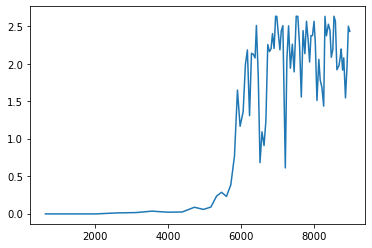

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(episode_id, test_reward)
plt.xscale('linear')


In [27]:
from collections import deque
best_act_net = model.ModelActor(
    state_size*2,
    action_size*2).to(device)

best_act_net.load_state_dict(torch.load('saves/sac-tennis/best_+2.634_370000.dat'))
best_act_net.eval()
reward_buffer = deque(maxlen=100)
for i in range(200):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = best_act_net(torch.tensor(states).to('cuda').flatten().view(1,-1).float()) # select an action (for each agent)
        actions = np.clip(actions.detach().cpu().numpy(), -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    reward_buffer.append(np.mean(scores))
    print('Score (average over agents) from episode {}: {}'.format(i, np.mean(scores)))
print('Average score (over agents) for last 100 episodes {}'.format(np.mean(reward_buffer)))

Score (average over agents) from episode 0: 2.600000038743019
Score (average over agents) from episode 1: 2.650000039488077
Score (average over agents) from episode 2: 2.650000039488077
Score (average over agents) from episode 3: 2.600000038743019
Score (average over agents) from episode 4: 2.650000039488077
Score (average over agents) from episode 5: 2.650000039488077
Score (average over agents) from episode 6: 2.600000038743019
Score (average over agents) from episode 7: 2.650000039488077
Score (average over agents) from episode 8: 2.650000039488077
Score (average over agents) from episode 9: 2.600000038743019
Score (average over agents) from episode 10: 2.650000039488077
Score (average over agents) from episode 11: 2.650000039488077
Score (average over agents) from episode 12: 2.600000038743019
Score (average over agents) from episode 13: 2.650000039488077
Score (average over agents) from episode 14: 2.650000039488077
Score (average over agents) from episode 15: 2.600000038743019
Sc

Score (average over agents) from episode 129: 2.650000039488077
Score (average over agents) from episode 130: 2.600000038743019
Score (average over agents) from episode 131: 2.650000039488077
Score (average over agents) from episode 132: 2.650000039488077
Score (average over agents) from episode 133: 2.600000038743019
Score (average over agents) from episode 134: 2.650000039488077
Score (average over agents) from episode 135: 2.650000039488077
Score (average over agents) from episode 136: 2.600000038743019
Score (average over agents) from episode 137: 2.650000039488077
Score (average over agents) from episode 138: 2.650000039488077
Score (average over agents) from episode 139: 2.600000038743019
Score (average over agents) from episode 140: 2.650000039488077
Score (average over agents) from episode 141: 2.650000039488077
Score (average over agents) from episode 142: 2.600000038743019
Score (average over agents) from episode 143: 2.650000039488077
Score (average over agents) from episode